# Projet  M L

L'objectif principal de ce projet est d'analyser et de classifier les données concernant les patients souffrant de diverses affections hépatiques. Les données englobent des données démographiques telles que l'âge et le sexe, ainsi que des résultats de tests de laboratoire. La variable cible à prédire est la catégorie de la condition hépatique du patient, pouvant être classée comme "Blood Donor", "suspect Blood Donor", "Hepatitis", "Fibrosis" ou "Cirrhosis".

# 1. Charger les données

In [1]:
# Importation de la bibliothèque pandas et aliasing en tant que pd
import pandas as pd

# Importation de la bibliothèque numpy et aliasing en tant que np
import numpy as np

# Importation du module de warnings
import warnings

# Ignorer les avertissements
warnings.filterwarnings("ignore")


In [2]:
# Lecture du fichier CSV et stockage de son contenu dans un DataFrame nommé 'data'
data = pd.read_csv("C:/Users/DELL/Downloads/Downloads/Projet_ILISI/Hep_C.csv")


# 2. Explorer les données

In [3]:
# Afficher les premières lignes du DataFrame 'data'
data.head()


,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,Blood Donor
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,Blood Donor
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,Blood Donor
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,Blood Donor
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,Blood Donor


In [4]:
# Afficher les dernières lignes du DataFrame 'data'
data.tail()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
610,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,Cirrhosis
611,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,Cirrhosis
612,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,Cirrhosis
613,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,Cirrhosis
614,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0,Cirrhosis


In [5]:
# Mélanger les lignes du DataFrame 'data' et réordonner aléatoirement les observations
# en utilisant une fraction de 1 pour maintenir toutes les lignes, 
# avec un random_state fixé à 42 pour obtenir des résultats reproductibles
df = data.sample(frac=1, random_state=42)


In [6]:
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
248,55,m,28.1,65.5,16.6,17.5,2.8,5.58,4.39,65.0,26.2,62.4,Blood Donor
365,39,f,31.4,106.0,16.6,17.0,2.4,5.95,5.30,68.0,22.9,72.3,Blood Donor
432,48,f,43.7,50.1,17.3,26.3,8.1,8.15,5.38,64.0,13.4,73.1,Blood Donor
610,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,Cirrhosis
132,44,m,35.5,81.7,27.5,29.5,6.4,8.81,6.65,83.0,24.1,68.0,Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,38,m,39.9,62.9,71.7,43.9,10.4,10.90,7.01,99.0,88.3,73.1,Blood Donor
106,41,m,44.7,74.9,25.2,20.2,6.3,10.34,4.23,74.0,23.7,72.1,Blood Donor
270,59,m,39.8,49.4,25.4,21.4,24.7,7.50,3.69,86.0,18.7,71.9,Blood Donor
435,48,f,44.4,52.5,16.4,23.4,4.5,9.06,6.78,74.0,10.3,73.1,Blood Donor


In [7]:
# Réinitialiser l'index du DataFrame 'df' après le mélange pour obtenir un nouvel index continu
df = df.reset_index(drop=True)


In [8]:
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,55,m,28.1,65.5,16.6,17.5,2.8,5.58,4.39,65.0,26.2,62.4,Blood Donor
1,39,f,31.4,106.0,16.6,17.0,2.4,5.95,5.30,68.0,22.9,72.3,Blood Donor
2,48,f,43.7,50.1,17.3,26.3,8.1,8.15,5.38,64.0,13.4,73.1,Blood Donor
3,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,Cirrhosis
4,44,m,35.5,81.7,27.5,29.5,6.4,8.81,6.65,83.0,24.1,68.0,Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,38,m,39.9,62.9,71.7,43.9,10.4,10.90,7.01,99.0,88.3,73.1,Blood Donor
611,41,m,44.7,74.9,25.2,20.2,6.3,10.34,4.23,74.0,23.7,72.1,Blood Donor
612,59,m,39.8,49.4,25.4,21.4,24.7,7.50,3.69,86.0,18.7,71.9,Blood Donor
613,48,f,44.4,52.5,16.4,23.4,4.5,9.06,6.78,74.0,10.3,73.1,Blood Donor


In [9]:
# Mélanger aléatoirement les lignes du DataFrame 'data' en utilisant la fonction shuffle de scikit-learn
# avec un random_state fixé à 0 pour garantir des résultats reproductibles
from sklearn.utils import shuffle
df1 = shuffle(data, random_state=0)

In [10]:
# Réinitialiser l'index du DataFrame 'df1' après le mélange pour obtenir un nouvel index continu
df1 = df1.reset_index(drop=True)


In [11]:
# Afficher des informations sur le DataFrame 'data', y compris le nombre de lignes et de colonnes, 
# le type de données de chaque colonne et la quantité de mémoire utilisée
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       615 non-null    int64  
 1   Sex       615 non-null    object 
 2   ALB       614 non-null    float64
 3   ALP       597 non-null    float64
 4   ALT       614 non-null    float64
 5   AST       615 non-null    float64
 6   BIL       615 non-null    float64
 7   CHE       615 non-null    float64
 8   CHOL      605 non-null    float64
 9   CREA      615 non-null    float64
 10  GGT       615 non-null    float64
 11  PROT      614 non-null    float64
 12  Category  615 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [12]:
# Compter le nombre d'occurrences de chaque valeur dans la colonne 'Sex' du DataFrame 'data'
data["Sex"].value_counts()


Sex
m    377
f    238
Name: count, dtype: int64

In [13]:
# Compter le nombre d'occurrences de chaque valeur dans la colonne 'Age' du DataFrame 'data'
data["Age"].value_counts()


Age
46    32
48    28
33    25
51    24
52    22
50    21
49    21
35    21
38    20
53    20
37    20
43    20
44    20
47    20
56    20
45    19
34    19
59    18
32    17
57    16
36    16
41    16
39    15
40    14
55    14
42    13
54    12
60    12
58    10
61     9
64     9
62     8
65     8
63     6
68     4
66     4
67     3
70     3
71     3
76     2
74     2
29     2
77     1
19     1
23     1
25     1
27     1
30     1
75     1
Name: count, dtype: int64

In [14]:
# Compter le nombre d'occurrences de chaque valeur dans la colonne 'Category' du DataFrame 'data'
data["Category"].value_counts()

Category
Blood Donor            533
Cirrhosis               30
Hepatitis               24
Fibrosis                21
suspect Blood Donor      7
Name: count, dtype: int64

In [15]:
# Afficher le nombre de lignes et de colonnes dans le DataFrame 'data'
data.shape

(615, 13)

<Axes: ylabel='count'>

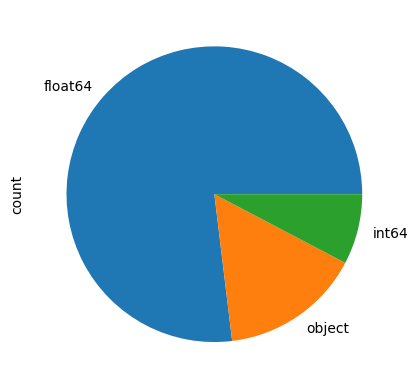

In [16]:
# Compter le nombre de colonnes de chaque type de données dans le DataFrame 'data' 
# et afficher les résultats sous forme de diagramme circulaire (pie chart)
data.dtypes.value_counts().plot.pie()


In [17]:
# Importer le module pyplot de la bibliothèque matplotlib et l'aliaser en tant que plt
import matplotlib.pyplot as plt
# Importer la bibliothèque seaborn et l'aliaser en tant que sns
import seaborn as sns

<Axes: >

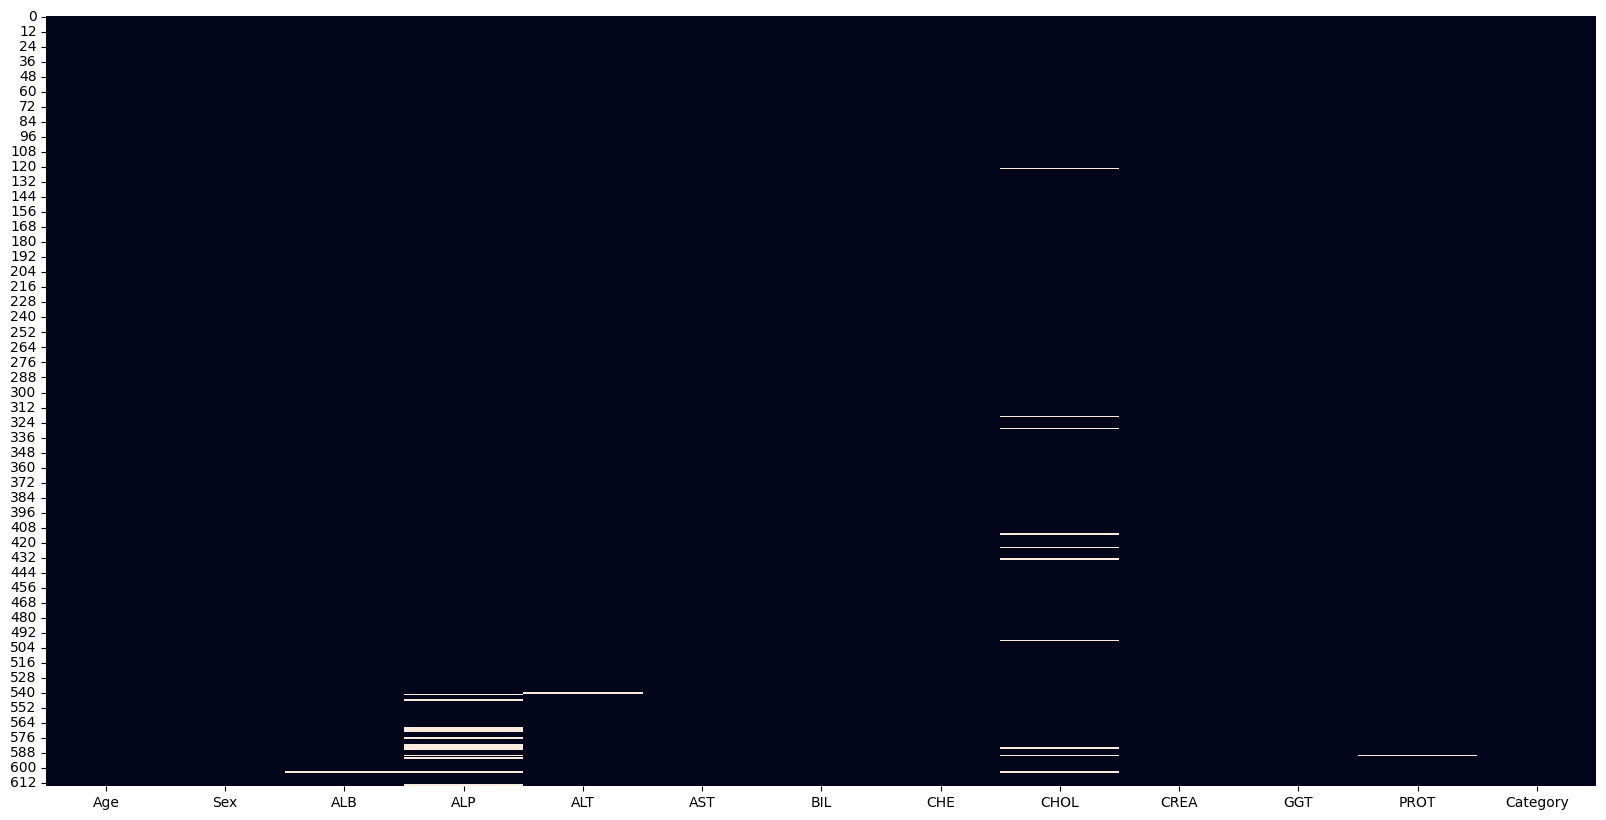

In [18]:
# Créer une figure de taille personnalisée de 20x10 pouces
plt.figure(figsize=(20, 10))

# Afficher une carte thermique (heatmap) pour visualiser les valeurs manquantes (NaN) dans le DataFrame 'data'
# en désactivant la barre de couleur (cbar=False)
sns.heatmap(data.isna(), cbar=False)


In [19]:
# Calculer la proportion de valeurs manquantes pour chaque colonne dans le DataFrame 'data',
# en divisant le nombre de valeurs manquantes par le nombre total de lignes,
# puis trier les résultats par ordre croissant
(data.isna().sum() / data.shape[0]).sort_values(ascending=True)


Age         0.000000
Sex         0.000000
AST         0.000000
BIL         0.000000
CHE         0.000000
CREA        0.000000
GGT         0.000000
Category    0.000000
ALB         0.001626
ALT         0.001626
PROT        0.001626
CHOL        0.016260
ALP         0.029268
dtype: float64

Statistiques :

In [20]:
# Afficher les statistiques descriptives pour les colonnes numériques du DataFrame 'data'
data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


Âge :
Nombre total d'observations : 615.
Âge moyen des patients : environ 47 ans.
Écart-type de l'âge : environ 10 ans, ce qui indique une dispersion modérée des âges autour de la moyenne.
Âge minimum observé : 19 ans.
Âge maximum observé : 77 ans.
Les quartiles (Q1, Q2, Q3) fournissent des informations sur la répartition des âges :
25 % des patients ont 39 ans ou moins (Q1).
50 % des patients ont 47 ans ou moins (Q2, médiane).
75 % des patients ont 54 ans ou moins (Q3).

Niveaux de biomarqueurs (ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT) :
Pour chaque biomarqueur, les statistiques descriptives incluent le nombre total d'observations, la moyenne, l'écart-type, la 
valeur minimale, les quartiles (Q1, Q2, Q3) et la valeur maximale.

Par exemple, pour ALB (albumine) :
Nombre total d'observations : 614.
Moyenne des niveaux d'albumine : environ 41.62 g/L.
Écart-type des niveaux d'albumine : environ 5.78 g/L.
Niveau minimum d'albumine observé : 14.9 g/L.
Niveau maximum d'albumine observé : 82.2 g/L.
Les quartiles fournissent des informations sur la répartition des niveaux d'albumine dans l'ensemble de données.

Ces statistiques permettent de mieux comprendre la distribution et la variabilité des variables numériques dans l'ensemble de données, ce qui est utile pour l'analyse et la modélisation ultérieures.

In [21]:
pd.crosstab(data['Age'], data['Category'])

Category,Blood Donor,Cirrhosis,Fibrosis,Hepatitis,suspect Blood Donor
Age,,,,,
19,0,0,0,1,0
23,0,0,0,1,0
25,0,0,0,1,0
27,0,0,0,1,0
29,0,0,1,1,0
30,0,0,0,1,0
32,15,0,0,2,0
33,24,0,0,1,0
34,18,0,0,1,0


In [22]:
pd.crosstab(data['Sex'], data['Category'])

Category,Blood Donor,Cirrhosis,Fibrosis,Hepatitis,suspect Blood Donor
Sex,,,,,
f,215,10,8,4,1
m,318,20,13,20,6


# 3. Interpréter les résultats

Nous pouvons observer que la catégorie la plus fréquente dans chaque tranche d'âge est souvent "Blood Donor", ce qui suggère que la majorité des patients dans cet ensemble de données sont des donneurs de sang sains.
Cependant, nous remarquons également la présence d'autres catégories dans certaines tranches d'âge. Par exemple, les catégories "Hepatitis" et "suspect Blood Donor" apparaissent principalement chez les patients âgés de plus de 40 ans, tandis que les catégories "Cirrhosis" et "Fibrosis" sont plus fréquentes chez les patients plus âgés, avec une augmentation notable à partir de 50 ans.
Cette distribution des catégories de la variable cible en fonction de l'âge suggère qu'il peut exister une relation entre l'âge des patients et la probabilité de développer certaines conditions hépatiques. Par exemple, les affections hépatiques graves comme la cirrhose et la fibrose semblent être plus fréquentes chez les patients plus âgés.

Nous observons que dans l'ensemble des données, le nombre de donneurs de sang sains ("Blood Donor") est plus élevé chez les patients de sexe masculin que chez les patients de sexe féminin. Cependant, les différences entre les sexes semblent être moins prononcées pour les autres catégories de la variable cible.
En ce qui concerne les affections hépatiques telles que la cirrhose, la fibrose et l'hépatite, nous remarquons également des différences dans leur répartition entre les sexes. Par exemple, il semble y avoir plus de cas de cirrhose chez les patients de sexe masculin que chez les patients de sexe féminin.
De même, les cas de fibrose et d'hépatite semblent également être plus fréquents chez les patients de sexe masculin, bien que les différences entre les sexes ne soient pas aussi marquées que pour la cirrhose.


Les résultats de l'analyse des valeurs manquantes dans le DataFrame fournissent des informations cruciales sur la qualité et l'intégrité des données. Globalement, la plupart des colonnes présentent très peu de valeurs manquantes, voire aucune. Cela suggère une bonne qualité des données dans ces attributs, ce qui est essentiel pour des analyses précises et fiables. Cependant, quelques colonnes comme "ALB", "ALT", "PROT", "CHOL" et "ALP" montrent des taux de valeurs manquantes plus élevés, bien que toujours relativement faibles. Il est donc nécessaire de prendre des mesures appropriées pour traiter ces valeurs manquantes

# 4. Choisir les graphes appropriés et visualiser les données

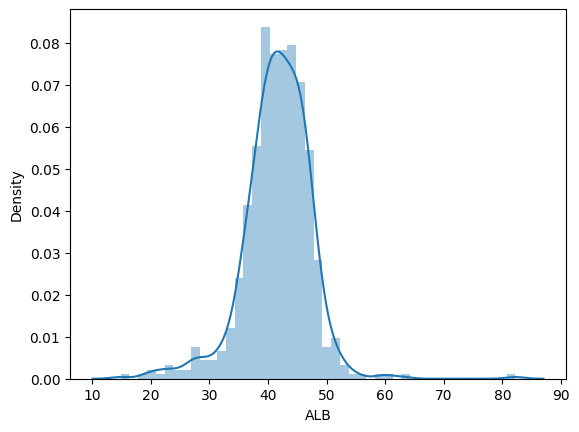

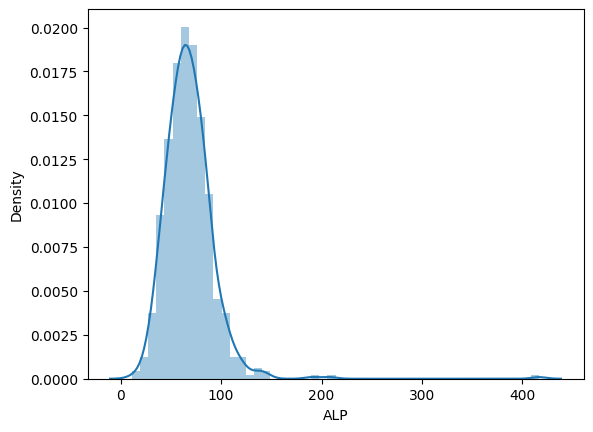

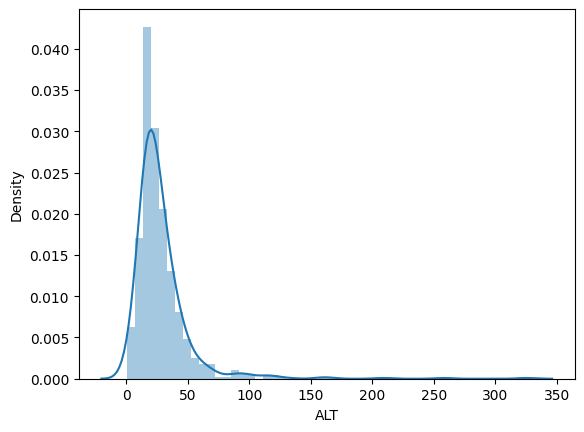

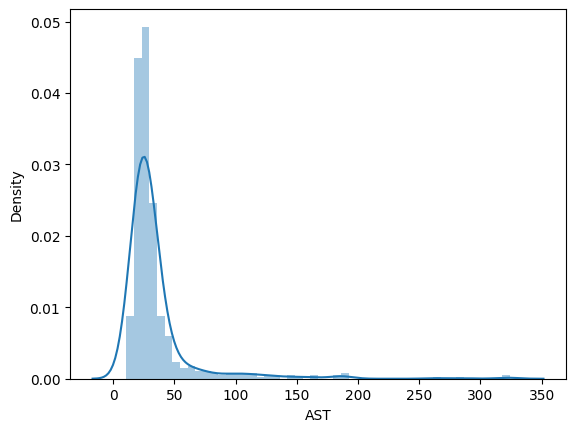

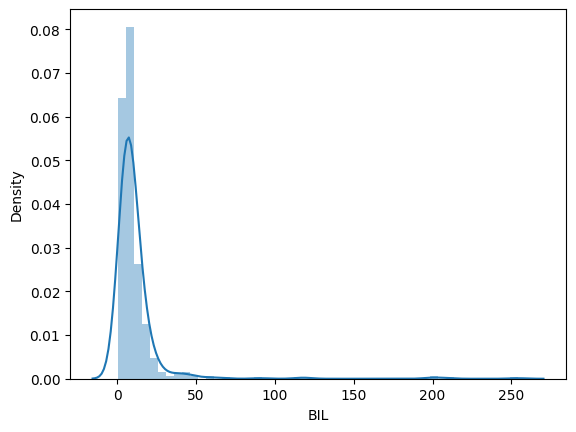

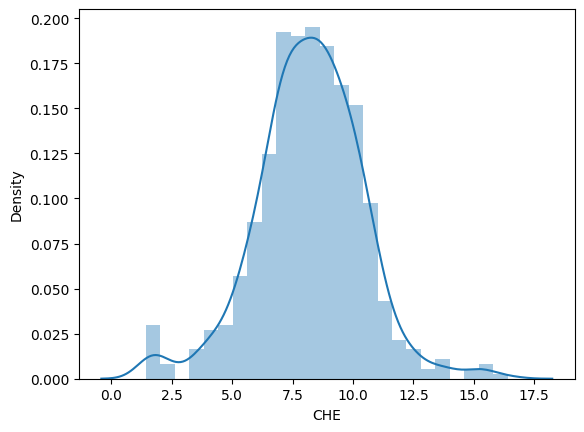

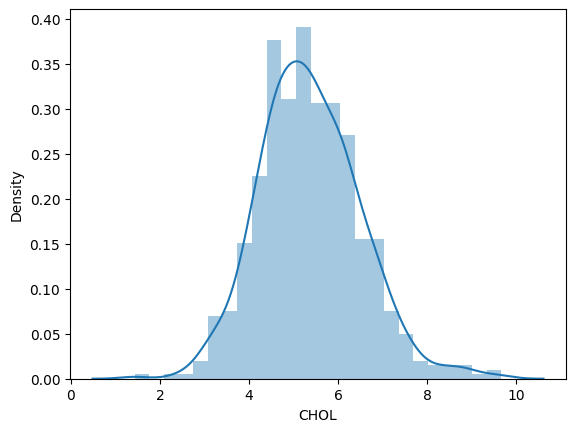

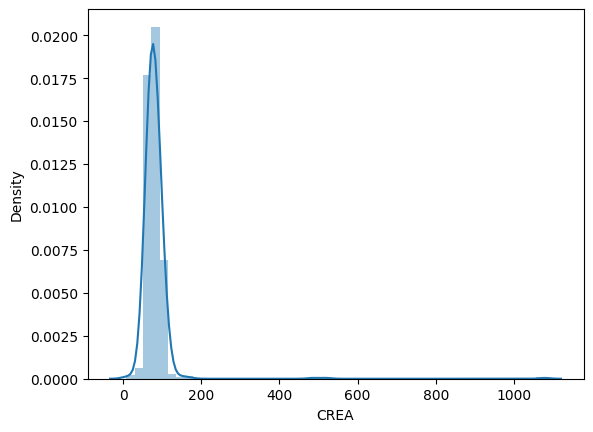

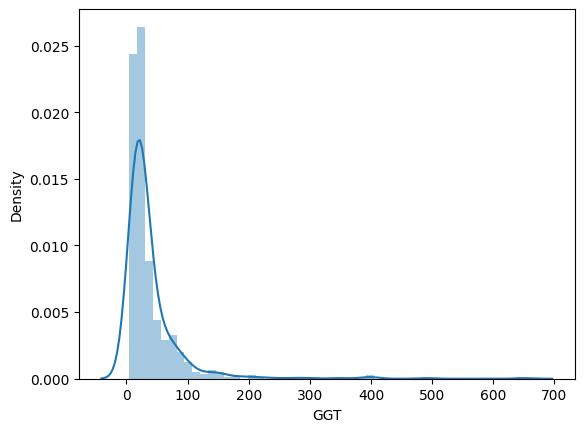

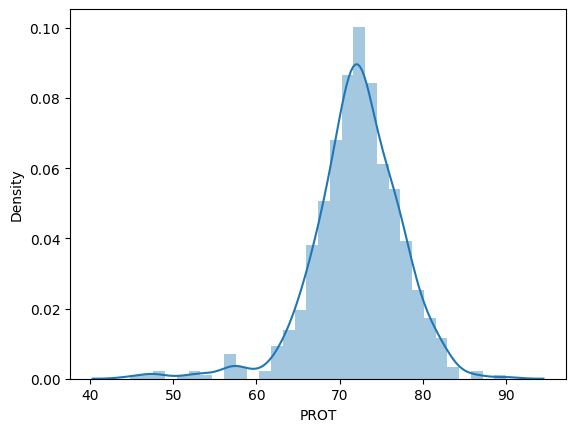

In [23]:
# Pour chaque colonne de type float dans le DataFrame,
# Crée un nouveau tracé de distribution en utilisant seaborn
# pour visualiser la distribution des valeurs dans cette colonne.

for col in data.select_dtypes('float'):
    plt.figure()
    sns.distplot(data[col])

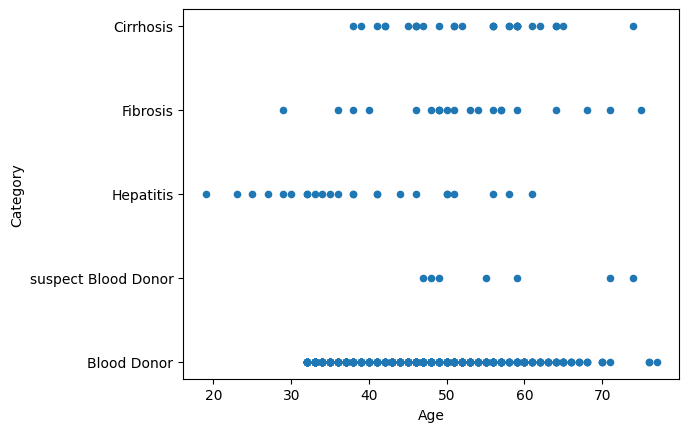

In [24]:
# Ce code crée un nuage de points (scatter plot) pour visualiser la relation entre les variables "x" et "y" dans le DataFrame 'data'. 
# Chaque point représente une paire de valeurs (x, y), offrant ainsi une représentation graphique de la distribution spatiale des données.
# Création du nuage de points pour visualiser la relation entre deux variables
data.plot(kind="scatter", x="Age", y="Category")

# Affichage du nuage de points
plt.show()


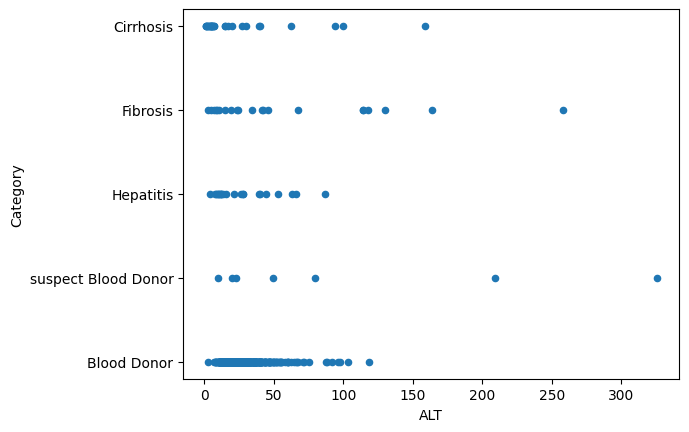

In [25]:
# Création du nuage de points pour visualiser la relation entre deux variables
data.plot(kind="scatter", x="ALT", y="Category")

# Affichage du nuage de points
plt.show()


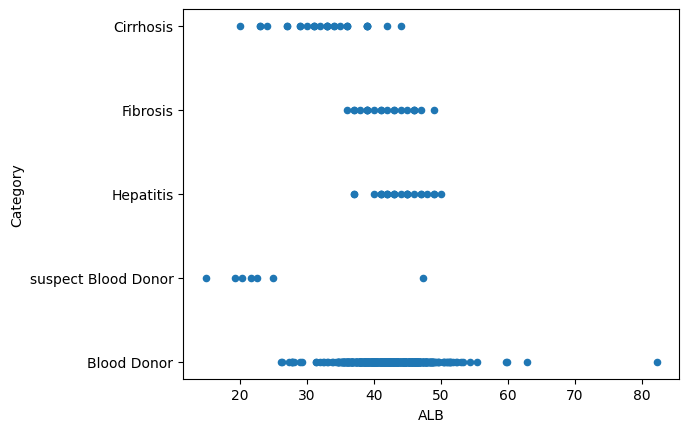

In [26]:
# Création du nuage de points pour visualiser la relation entre deux variables
data.plot(kind="scatter", x="ALB", y="Category")

# Affichage du nuage de points
plt.show()


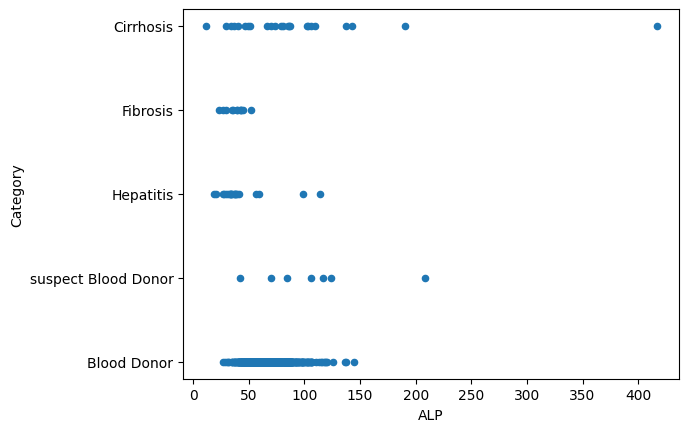

In [27]:
# Création du nuage de points pour visualiser la relation entre deux variables
data.plot(kind="scatter", x="ALP", y="Category")

# Affichage du nuage de points
plt.show()


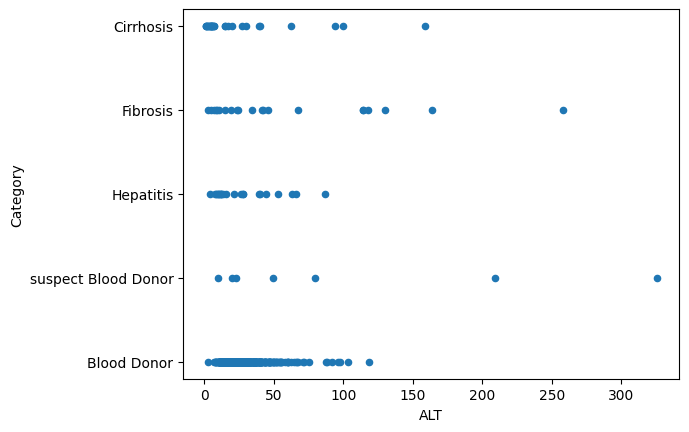

In [28]:
# Création du nuage de points pour visualiser la relation entre deux variables
data.plot(kind="scatter", x="ALT", y="Category")

# Affichage du nuage de points
plt.show()


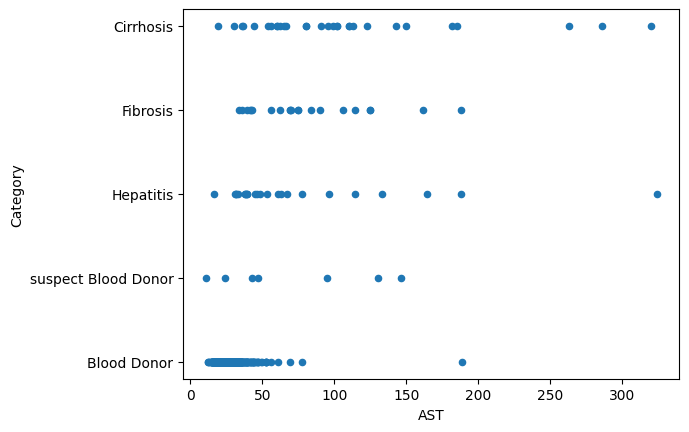

In [29]:
# Création du nuage de points pour visualiser la relation entre deux variables
data.plot(kind="scatter", x="AST", y="Category")

# Affichage du nuage de points
plt.show()


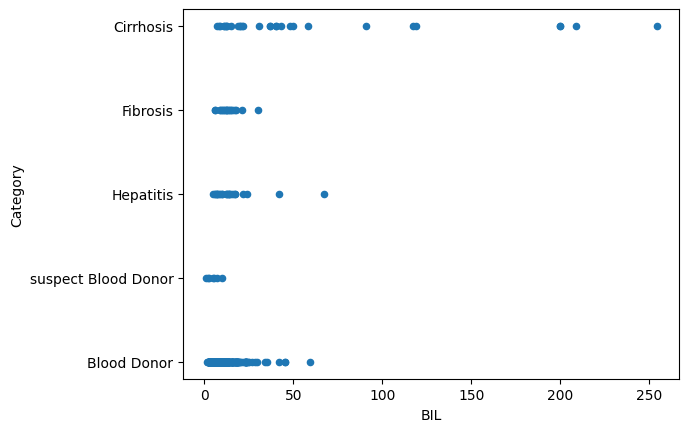

In [30]:
# Création du nuage de points pour visualiser la relation entre deux variables
data.plot(kind="scatter", x="BIL", y="Category")

# Affichage du nuage de points
plt.show()


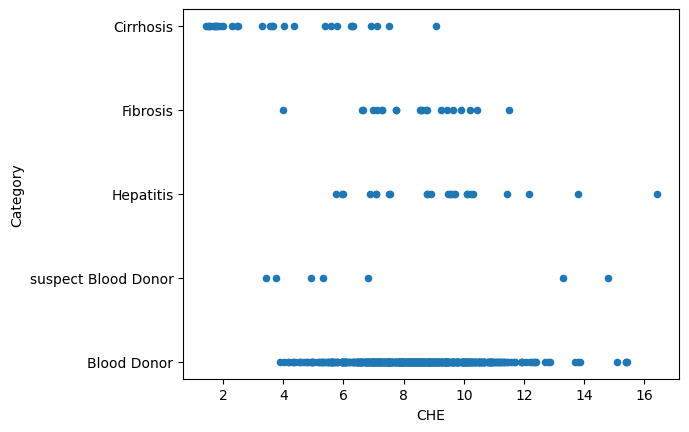

In [31]:
# Création du nuage de points pour visualiser la relation entre deux variables
data.plot(kind="scatter", x="CHE", y="Category")

# Affichage du nuage de points
plt.show()


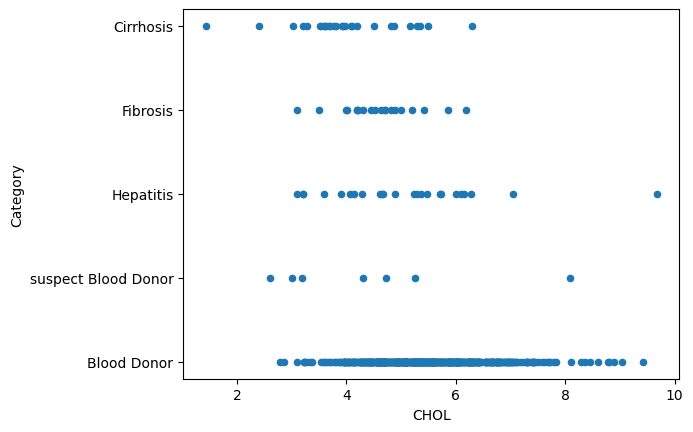

In [32]:
# Création du nuage de points pour visualiser la relation entre deux variables
data.plot(kind="scatter", x="CHOL", y="Category")

# Affichage du nuage de points
plt.show()


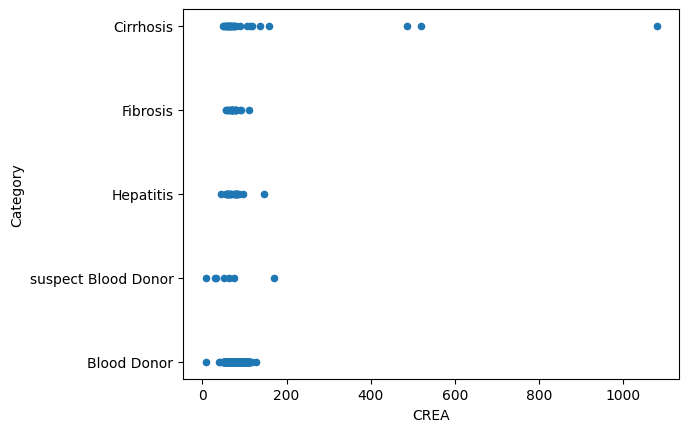

In [33]:
# Création du nuage de points pour visualiser la relation entre deux variables
data.plot(kind="scatter", x="CREA", y="Category")

# Affichage du nuage de points
plt.show()


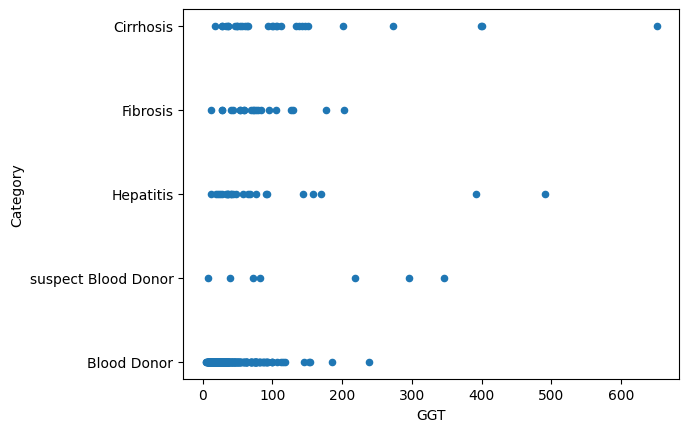

In [34]:
# Création du nuage de points pour visualiser la relation entre deux variables
data.plot(kind="scatter", x="GGT", y="Category")

# Affichage du nuage de points
plt.show()


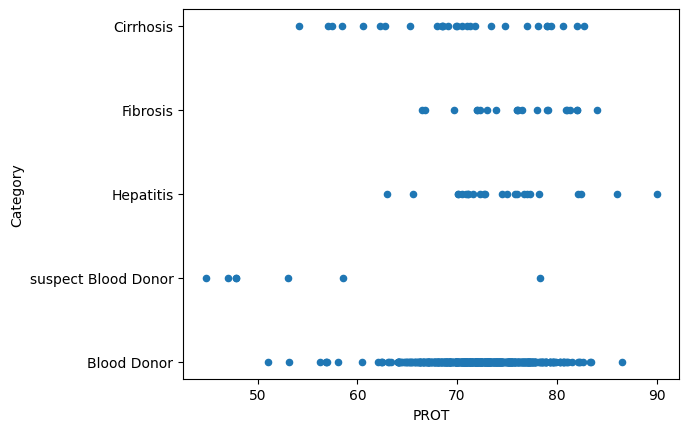

In [35]:
# Création du nuage de points pour visualiser la relation entre deux variables
data.plot(kind="scatter", x="PROT", y="Category")

# Affichage du nuage de points
plt.show()


<Axes: xlabel='Age', ylabel='Category'>

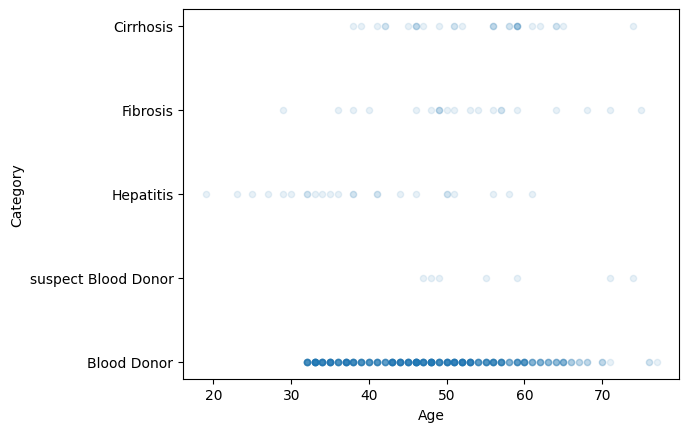

In [36]:
# Ce code crée un nuage de points pour visualiser la relation entre l'âge et la catégorie dans le DataFrame 'data'.
# Chaque point représente une observation, avec l'âge sur l'axe des x et la catégorie sur l'axe des y.
# L'argument 'alpha' est défini sur 0.1 pour rendre les points partiellement transparents, ce qui permet de mieux visualiser les densités dans les zones de chevauchement.
data.plot(kind="scatter", x="Age", y="Category", alpha=0.1)


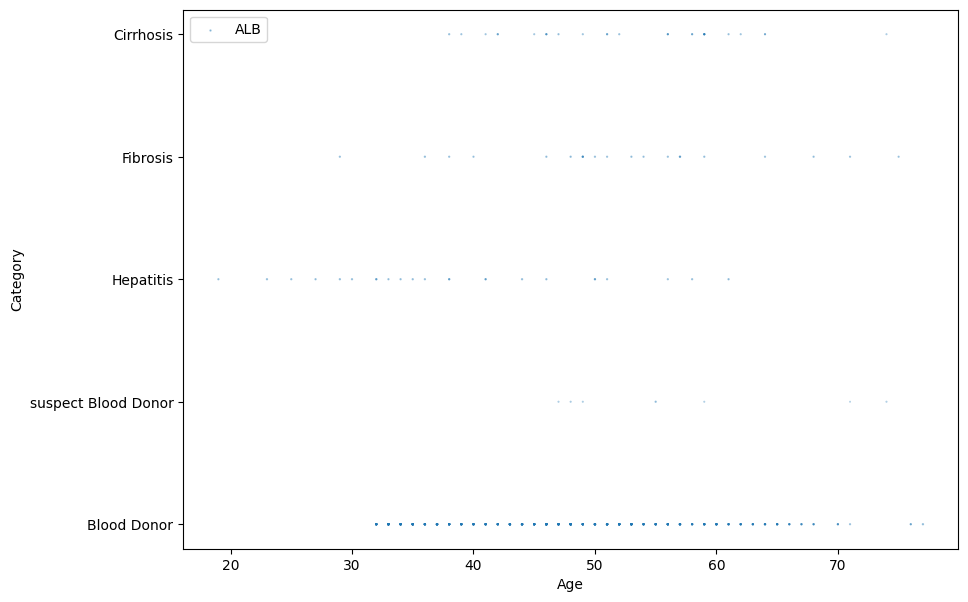

In [37]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt

# Création du nuage de points pour visualiser la relation entre les coordonnées géographiques et la colonne "ALB"
data.plot(kind="scatter", x="Age", y="Category", alpha=0.4, 
          s=data["ALB"]/100, label="ALB", figsize=(10, 7))

# Affichage du nuage de points
plt.show()


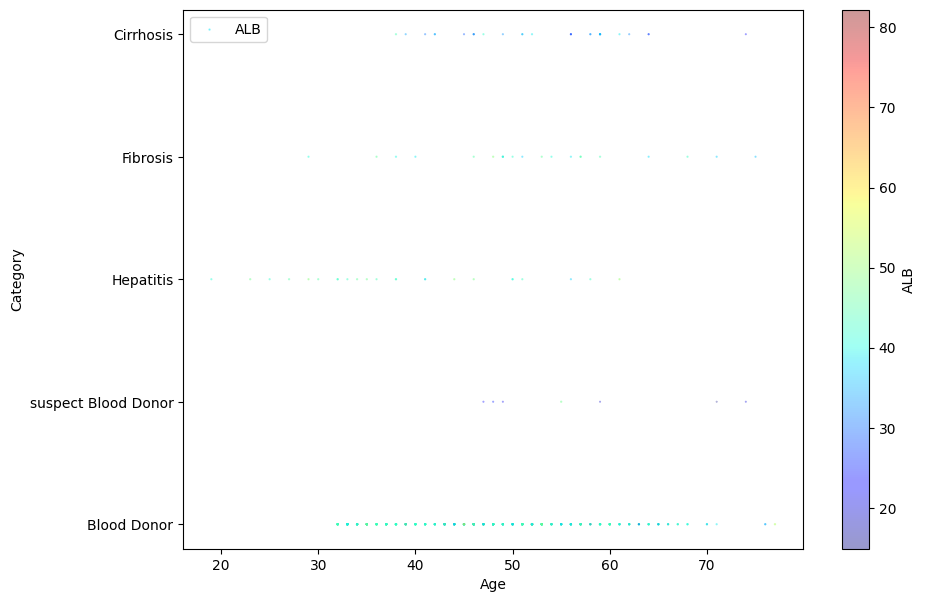

In [38]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt

# Création du nuage de points pour visualiser la relation entre les coordonnées géographiques, la taille des points et la valeur médiane des maisons
data.plot(kind="scatter", x="Age", y="Category", alpha=0.4, 
          s=data["ALB"]/100, label="ALB", figsize=(10, 7),
          c="ALB", cmap=plt.get_cmap("jet"), colorbar=True)

# Affichage du nuage de points
plt.show()


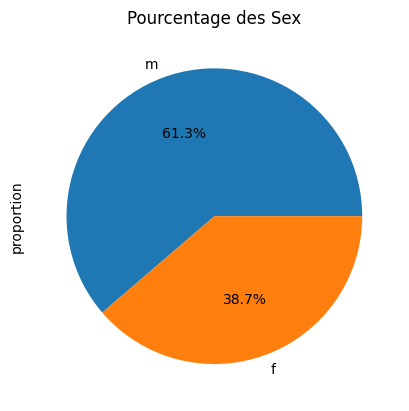

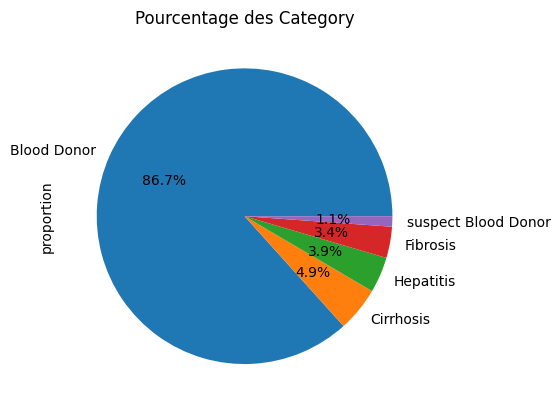

In [39]:
# Sélectionner les colonnes de type 'object'
object_cols = data.select_dtypes('object').columns

# Parcourir les colonnes sélectionnées
for col in object_cols:
    # Créer une nouvelle figure
    plt.figure()
    
    # Calculer les comptages des valeurs et générer un diagramme circulaire
    data[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
    
    # Ajouter un titre
    plt.title(f'Pourcentage des {col}')
    
    # Afficher le diagramme circulaire
    plt.show()


In [40]:
# Obtenez une liste de toutes les colonnes numerique 
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

<Figure size 640x480 with 0 Axes>

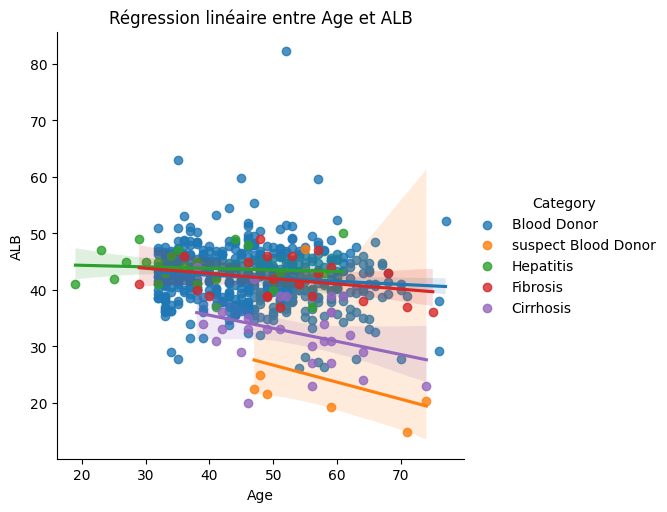

<Figure size 640x480 with 0 Axes>

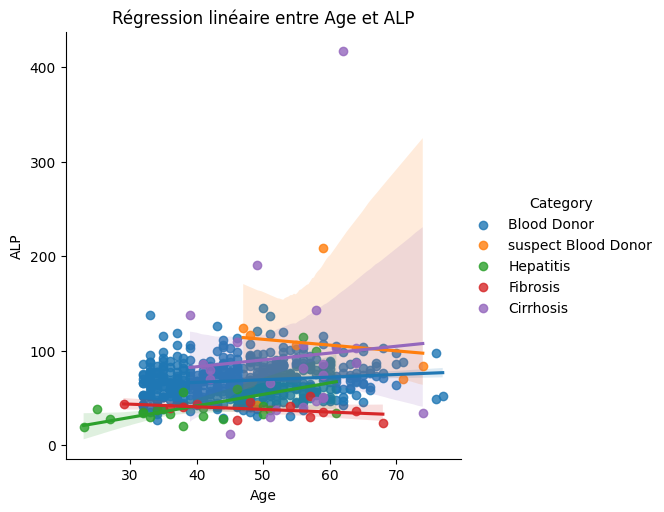

<Figure size 640x480 with 0 Axes>

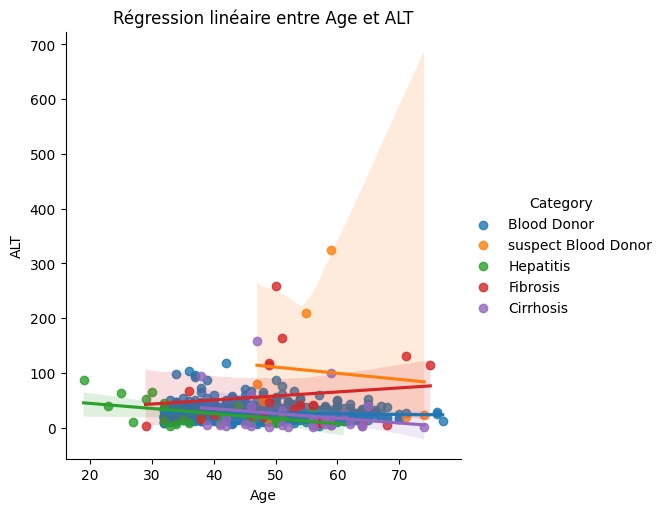

<Figure size 640x480 with 0 Axes>

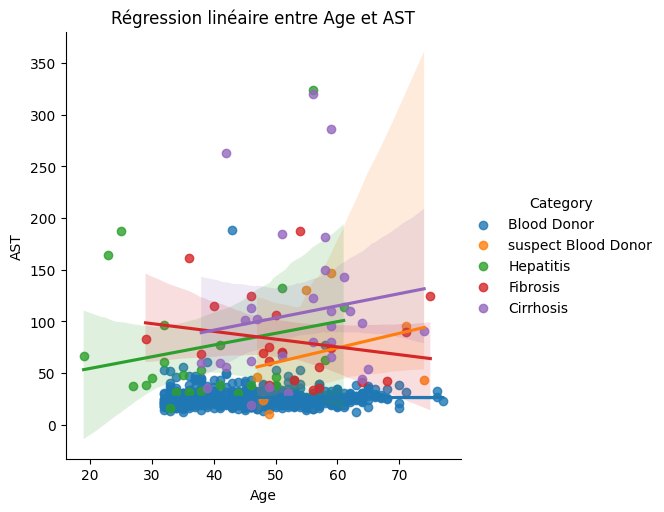

<Figure size 640x480 with 0 Axes>

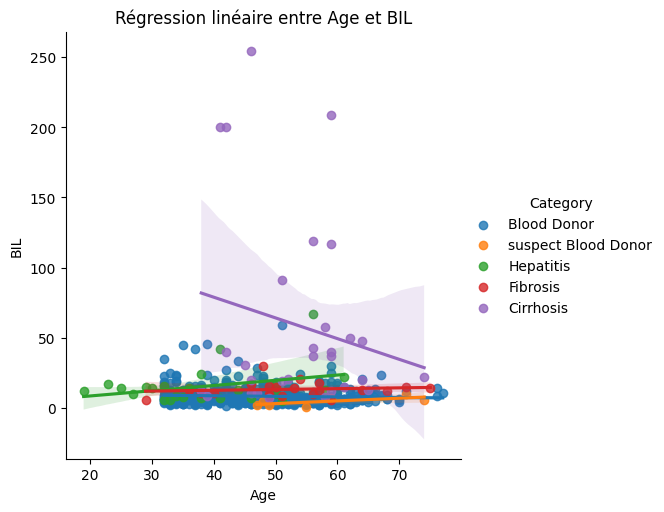

<Figure size 640x480 with 0 Axes>

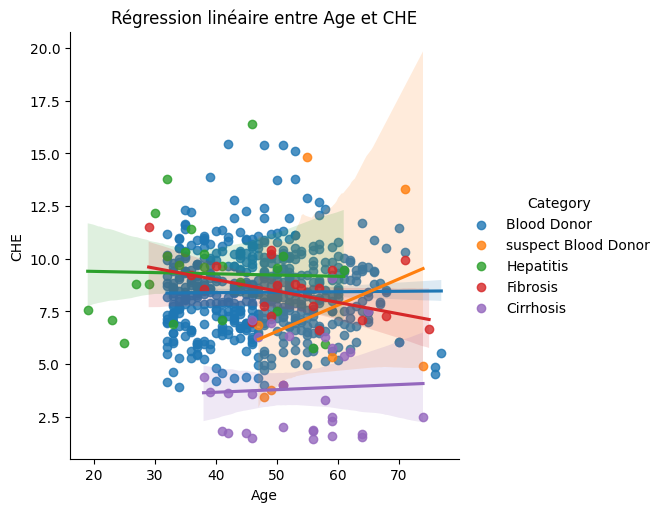

<Figure size 640x480 with 0 Axes>

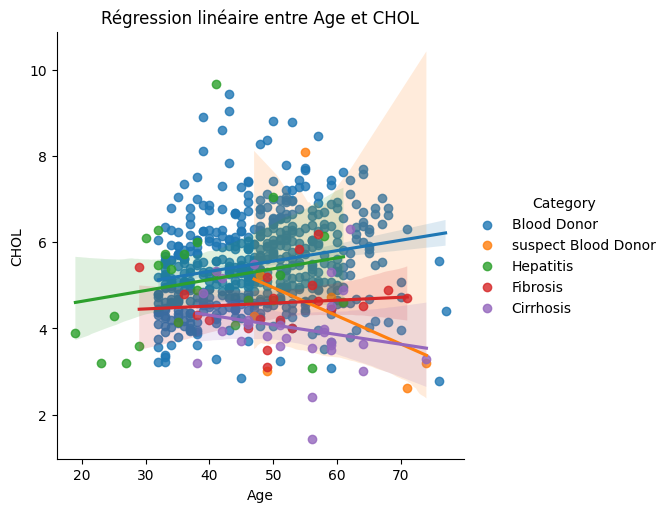

<Figure size 640x480 with 0 Axes>

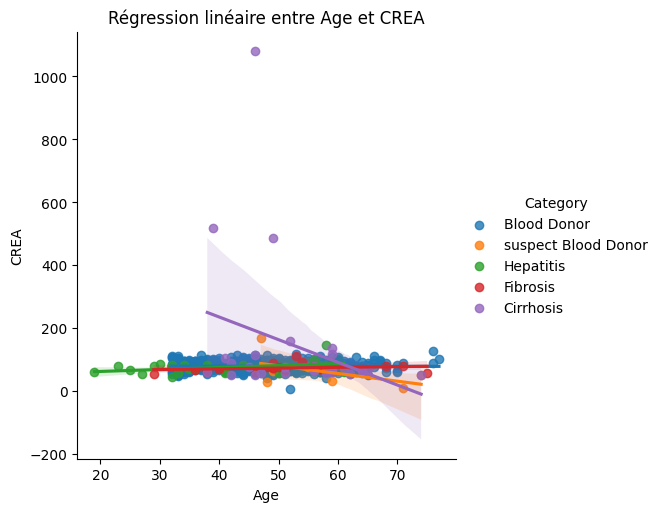

<Figure size 640x480 with 0 Axes>

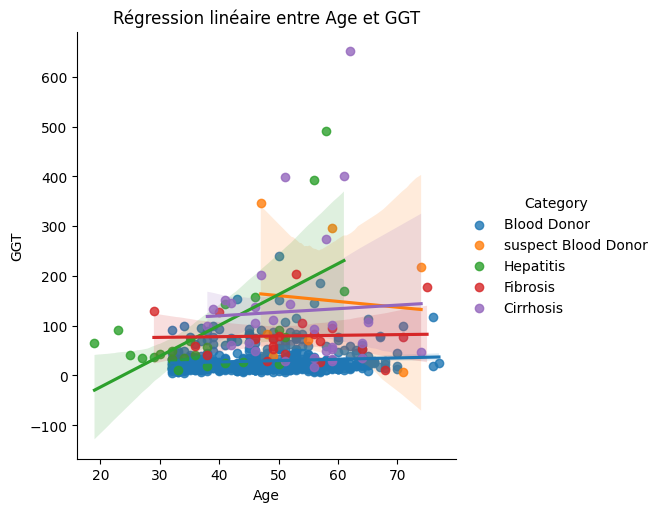

<Figure size 640x480 with 0 Axes>

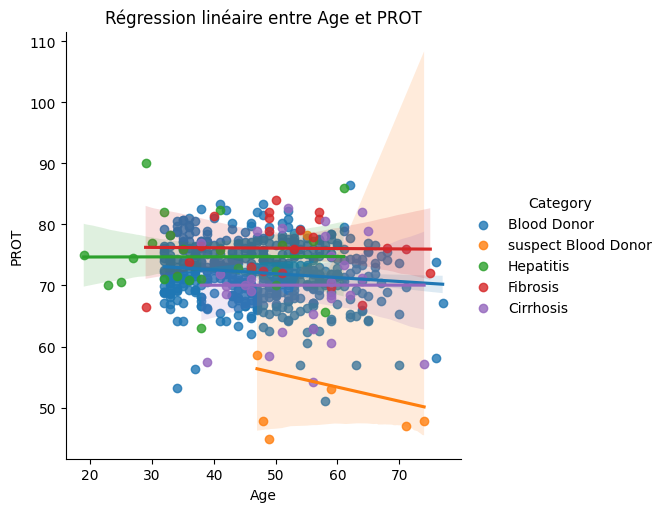

In [41]:
# Parcourez toutes les colonnes numériques pour tracer les régressions linéaires
for col in numeric_columns:
    if col != 'Age':  # Si vous ne voulez pas inclure la colonne 'Age'
        # Créer une nouvelle figure pour chaque colonne numérique
        plt.figure()
        
        # Tracer les régressions linéaires entre 'Age' et la colonne numérique pour chaque catégorie de 'Category'
        sns.lmplot(x='Age', y=col, hue='Category', data=data)
        
        # Ajouter un titre à la figure
        plt.title(f'Régression linéaire entre Age et {col}')
        
        # Afficher la figure
        plt.show()

<Figure size 1000x600 with 0 Axes>

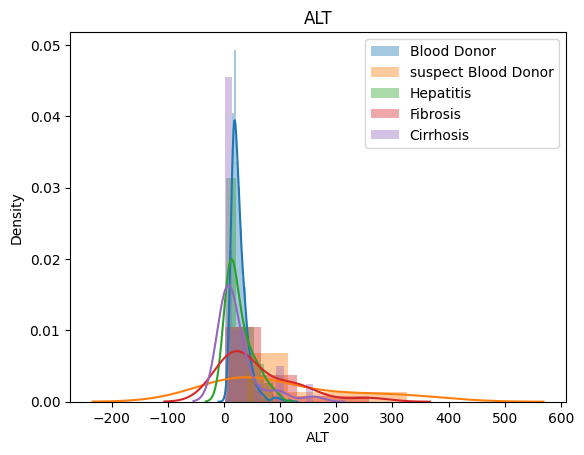

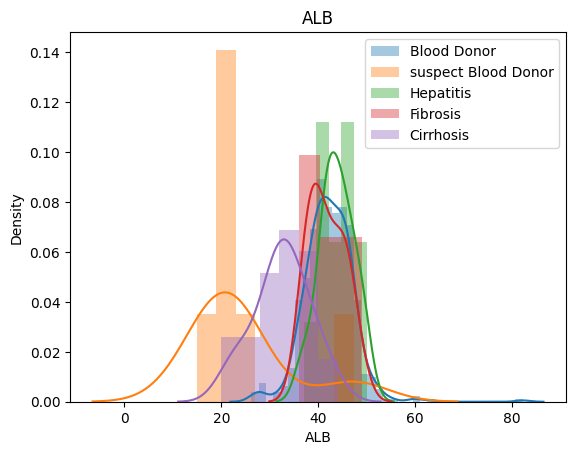

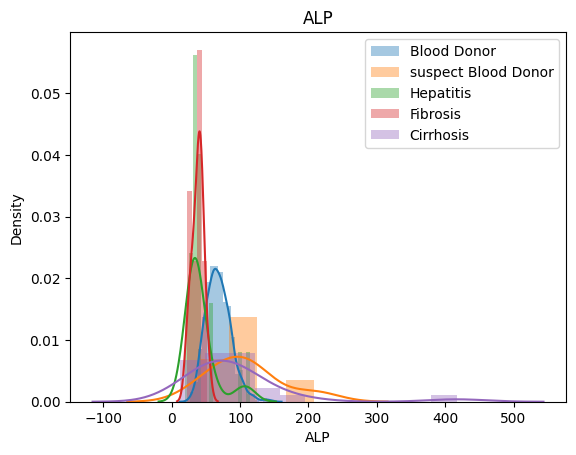

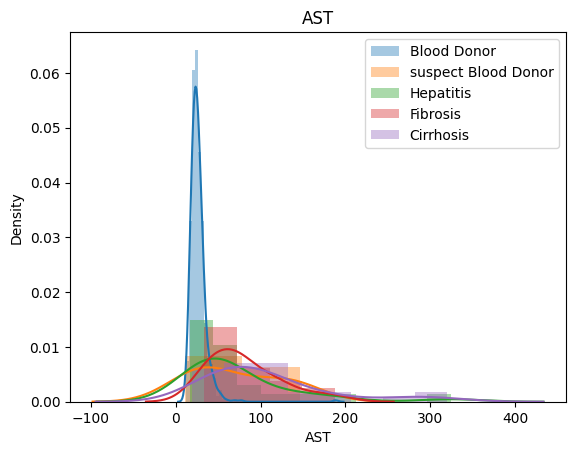

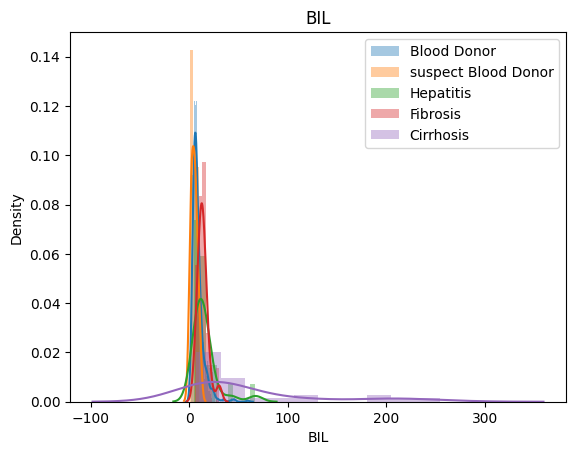

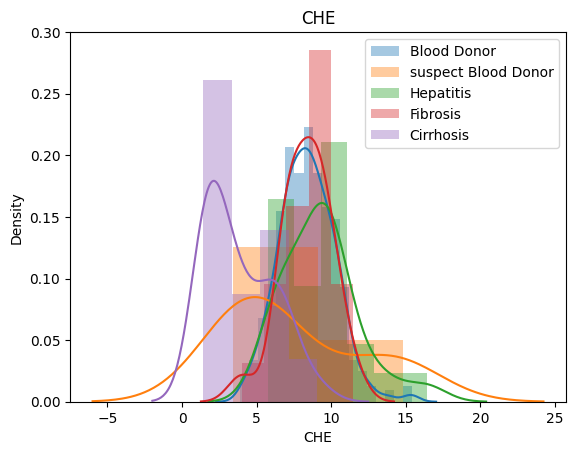

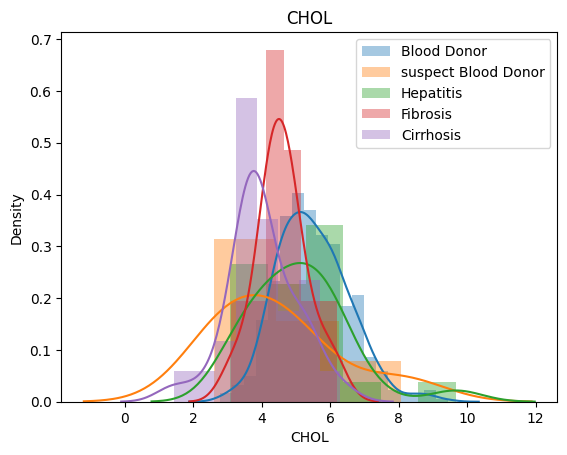

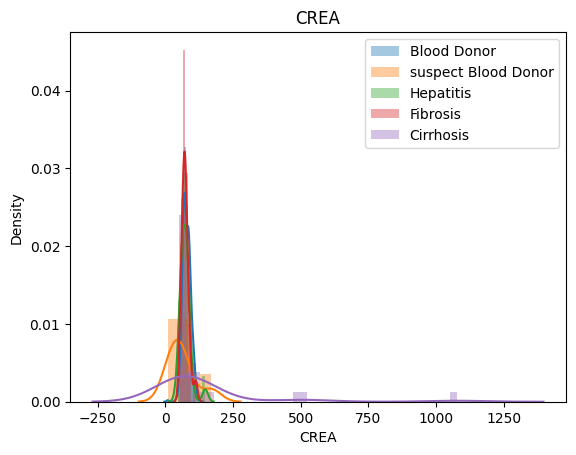

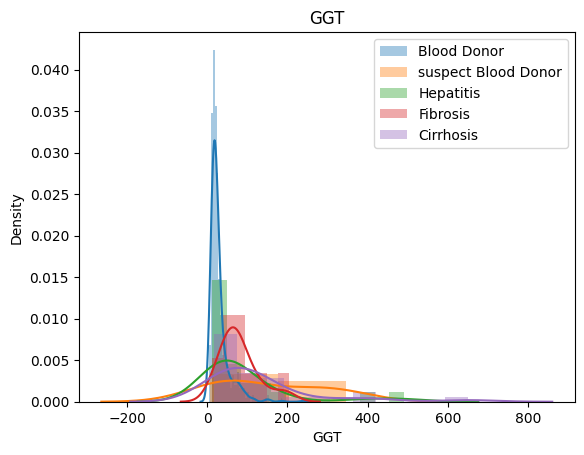

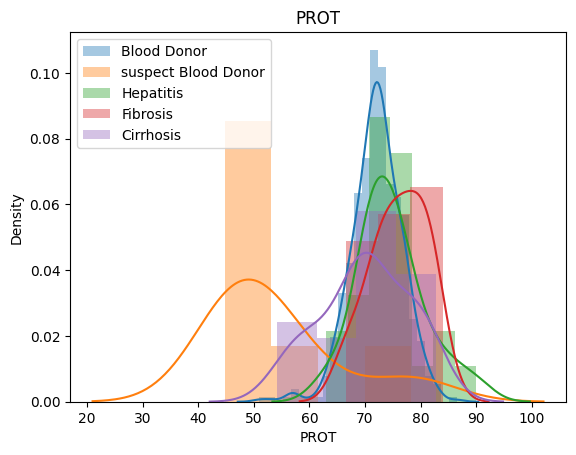

In [42]:
# Remplacez 'blood_columns' par les colonnes que vous souhaitez visualiser
columns = ['ALT', 'ALB', 'ALP', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Remplacez 'statut' par le nom de la colonne contenant les catégories
plt.figure(figsize=(10, 6))
for col in columns:
    plt.figure()
    for cat in data['Category'].unique():
        sns.distplot(data[data['Category'] == cat][col], label=cat)
    plt.legend()
    plt.title(col)
    plt.show()

In [43]:
data[columns].count()

ALT     614
ALB     614
ALP     597
AST     615
BIL     615
CHE     615
CHOL    605
CREA    615
GGT     615
PROT    614
dtype: int64

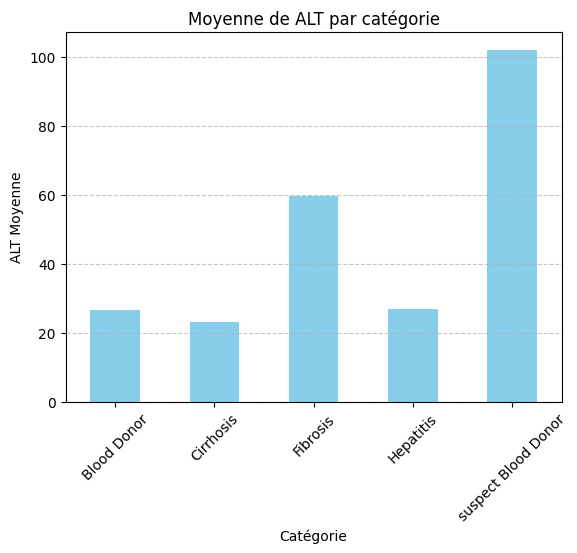

In [44]:
# Créer un DataFrame avec seulement les colonnes ALT et Category
df_selected = data[['ALT', 'Category']]

# Calculer la moyenne de ALT pour chaque catégorie
alt_mean_by_category = df_selected.groupby('Category')['ALT'].mean()

# Tracer un graphique à barres pour visualiser la relation entre ALT et Category
alt_mean_by_category.plot(kind='bar', color='skyblue')
plt.title('Moyenne de ALT par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('ALT Moyenne')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


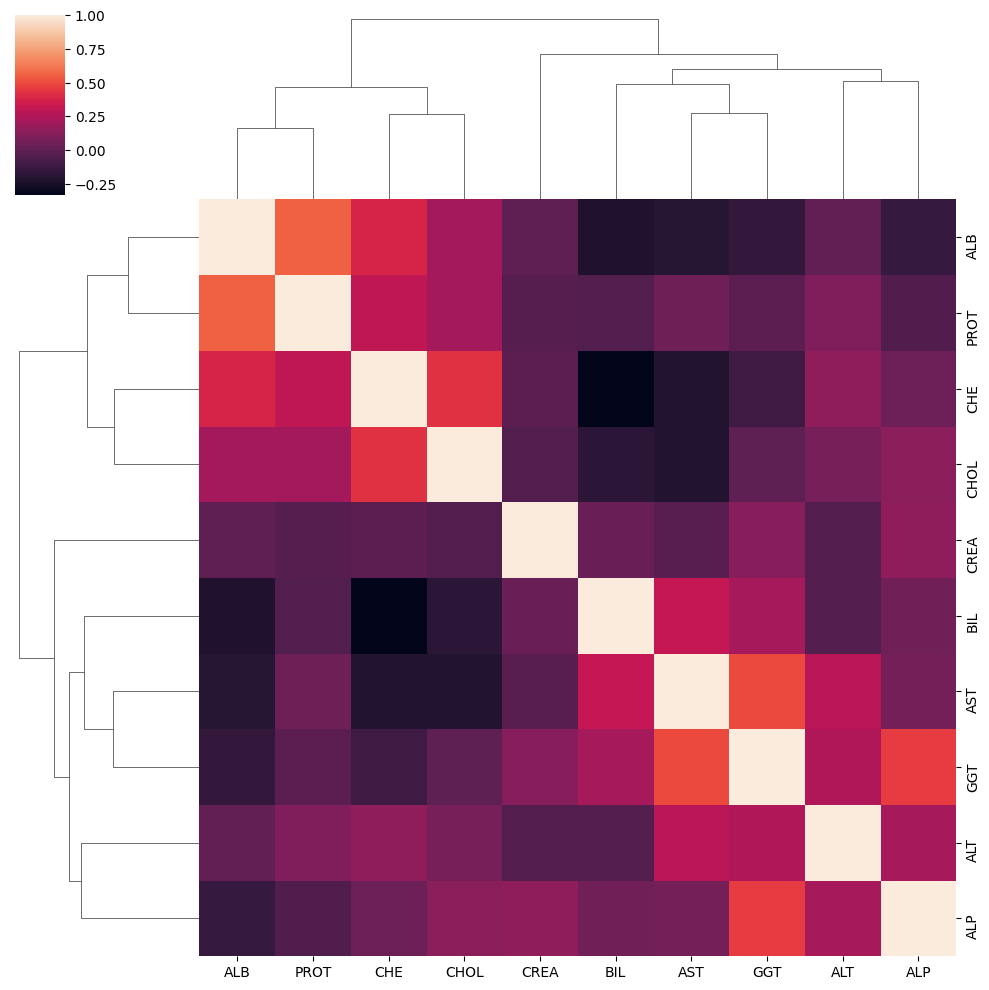

In [45]:
sns.clustermap(data[columns].corr())

# 5. Interpréter les graphes

Les données suggèrent que les patients suspects de don de sang et les patients atteints d'hépatite, de fibrose ou de cirrhose présentent des signes de dommages hépatiques, tandis que les donneurs de sang affichent des niveaux biochimiques généralement dans des plages normales.

Blood Donor :
Les niveaux moyens d'ALB (albumine) et de PROT (protéine totale) sont dans des plages normales, suggérant une santé hépatique normale.
Les niveaux d'ALP (phosphatase alcaline) et de GGT (gamma-glutamyl transférase) sont également dans des plages normales, indiquant un fonctionnement hépatique régulier.
Les niveaux d'AST (aspartate aminotransférase) et d'ALT (alanine aminotransférase) sont légèrement élevés mais restent dans des limites acceptables.

Suspect Blood Donor :
Les niveaux d'ALB et de PROT sont élevés, ce qui peut indiquer une réponse inflammatoire ou une maladie hépatique débutante.
Les niveaux d'ALP, d'AST et de GGT sont également élevés, suggérant des dommages hépatiques possibles.
Les niveaux d'ALT sont particulièrement élevés, ce qui est un indicateur clair de dommages hépatiques.

Hepatitis :
Les niveaux d'ALB et de PROT sont normaux, mais légèrement bas pour l'ALB.
Les niveaux d'AST et d'ALT sont élevés, indiquant une inflammation hépatique.
Les niveaux d'ALP et de GGT sont également élevés, ce qui suggère une cholestase ou une obstruction biliaire.

Fibrosis :
Les niveaux d'ALB et de PROT sont normaux.
Les niveaux d'ALP sont bas, tandis que les niveaux d'AST, d'ALT et de GGT sont élevés, ce qui indique des dommages hépatiques.

Cirrhosis :
Les niveaux d'ALB sont bas, ce qui est caractéristique de la cirrhose du foie.
Les niveaux d'ALP, d'AST, d'ALT et de GGT sont tous élevés, indiquant des dommages hépatiques avancés.

# 6. Nettoyer les données

In [46]:
# Créez une copie du DataFrame 'data' et assignez-la à la variable 'data2'
data2 = data.copy()
data2["ALB"].isnull().any()

True

In [47]:
# Calculer la moyenne de la colonne ALB
mean = data2["ALB"].mean()

# Remplacer les valeurs manquantes dans la colonne ALB par la moyenne calculée
data2["ALB"].fillna(mean, inplace=True)


In [48]:
data2["ALB"].isnull().any()

False

In [49]:
#ici on a les colonnes avec les attributs null
(data.isna().sum() / data.shape[0]).sort_values(ascending=True)

Age         0.000000
Sex         0.000000
AST         0.000000
BIL         0.000000
CHE         0.000000
CREA        0.000000
GGT         0.000000
Category    0.000000
ALB         0.001626
ALT         0.001626
PROT        0.001626
CHOL        0.016260
ALP         0.029268
dtype: float64

In [50]:
# Calculer la moyenne de la colonne
mean = data2["ALT"].mean()
# Remplacer les valeurs manquantes dans la colonne par la moyenne calculée
data2["ALT"].fillna(mean, inplace=True)

# Calculer la moyenne de la colonne
mean = data2["PROT"].mean()
# Remplacer les valeurs manquantes dans la colonne par la moyenne calculée
data2["PROT"].fillna(mean, inplace=True)

# Calculer la moyenne de la colonne
mean = data2["CHOL"].mean()
# Remplacer les valeurs manquantes dans la colonne par la moyenne calculée
data2["CHOL"].fillna(mean, inplace=True)

# Calculer la moyenne de la colonne
mean = data2["ALP"].mean()
# Remplacer les valeurs manquantes dans la colonne par la moyenne calculée
data2["ALP"].fillna(mean, inplace=True)

In [51]:
data=data2

In [52]:
#ici on a les colonnes avec les attributs null
(data.isna().sum() / data.shape[0]).sort_values(ascending=True)

Age         0.0
Sex         0.0
ALB         0.0
ALP         0.0
ALT         0.0
AST         0.0
BIL         0.0
CHE         0.0
CHOL        0.0
CREA        0.0
GGT         0.0
PROT        0.0
Category    0.0
dtype: float64

# 7. Traiter les données catégorielles ou symboliques


Convertir les variables catégorielles en des variables numériques

In [53]:
# Remplacer les valeurs 'm' par 0 et 'f' par 1 dans la colonne 'Sex' du DataFrame
data['Sex'] = data['Sex'].map({'m': 0, 'f': 1})

In [54]:
data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,Blood Donor
1,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,Blood Donor
2,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,Blood Donor
3,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,Blood Donor
4,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,Cirrhosis
611,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,Cirrhosis
612,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,Cirrhosis
613,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,Cirrhosis


In [55]:
# Appliquer l'encodage one-hot à la colonne 'Category'
data= pd.get_dummies(data, columns=['Category'])

In [56]:
# Remplacer True par 1 et False par 0 dans tout le DataFrame
data.replace({True: 1, False: 0}, inplace=True)


In [57]:
data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_Blood Donor,Category_Cirrhosis,Category_Fibrosis,Category_Hepatitis,Category_suspect Blood Donor
0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1,0,0,0,0
1,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1,0,0,0,0
2,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1,0,0,0,0
3,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1,0,0,0,0
4,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0,1,0,0,0
611,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0,1,0,0,0
612,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0,1,0,0,0
613,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0,1,0,0,0


# 8. Séparer les données en un ensemble de test et un ensemble d’entrainement.

In [58]:
# Importer la fonction train_test_split du module sklearn.model_selection
from sklearn.model_selection import train_test_split

In [59]:
# Sélectionner les colonnes à utiliser comme caractéristiques pour la prédiction
features = ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

In [60]:
# Définir la colonne cible
target = ['Category_Blood Donor','Category_Cirrhosis','Category_Fibrosis','Category_Hepatitis','Category_suspect Blood Donor']

In [61]:
# Diviser les données en caractéristiques (X) et cible (y)
X = data[features]
Y = data[target]

In [62]:
# Diviser les données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
X_train

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
83,39,0,36.6,71.3,28.9,25.9,6.1,5.70,4.660000,77.0,22.6,66.3
90,39,0,45.8,62.5,20.7,22.8,45.5,8.61,4.780000,77.0,15.9,75.5
228,53,0,44.5,61.2,14.4,18.1,8.0,6.95,5.000000,70.0,18.3,72.0
509,58,1,26.3,52.5,39.5,77.2,5.8,5.15,3.530000,40.0,31.2,51.0
329,33,1,42.4,137.2,14.2,13.1,3.4,8.23,5.368099,48.0,25.7,74.4
...,...,...,...,...,...,...,...,...,...,...,...,...
71,38,0,39.9,62.9,71.7,43.9,10.4,10.90,7.010000,99.0,88.3,73.1
106,41,0,44.7,74.9,25.2,20.2,6.3,10.34,4.230000,74.0,23.7,72.1
270,59,0,39.8,49.4,25.4,21.4,24.7,7.50,3.690000,86.0,18.7,71.9
435,48,1,44.4,52.5,16.4,23.4,4.5,9.06,6.780000,74.0,10.3,73.1


In [64]:
X_test

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
248,55,0,28.1,65.5,16.6,17.5,2.8,5.58,4.39,65.0,26.2,62.4
365,39,1,31.4,106.0,16.6,17.0,2.4,5.95,5.30,68.0,22.9,72.3
432,48,1,43.7,50.1,17.3,26.3,8.1,8.15,5.38,64.0,13.4,73.1
610,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
132,44,0,35.5,81.7,27.5,29.5,6.4,8.81,6.65,83.0,24.1,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...
281,61,0,45.9,73.3,17.1,24.3,4.8,10.01,4.95,88.0,23.5,70.8
291,63,0,45.3,71.3,16.6,24.1,5.7,8.92,4.69,81.0,19.8,73.7
250,55,0,41.5,59.5,15.4,16.2,6.8,6.35,5.22,80.0,12.4,69.9
11,33,0,46.4,68.2,10.3,20.0,5.7,7.36,4.30,79.0,18.7,68.6


In [65]:
Y_train

,Category_Blood Donor,Category_Cirrhosis,Category_Fibrosis,Category_Hepatitis,Category_suspect Blood Donor
83,1,0,0,0,0
90,1,0,0,0,0
228,1,0,0,0,0
509,1,0,0,0,0
329,1,0,0,0,0
...,...,...,...,...,...
71,1,0,0,0,0
106,1,0,0,0,0
270,1,0,0,0,0
435,1,0,0,0,0


In [66]:
Y_test

,Category_Blood Donor,Category_Cirrhosis,Category_Fibrosis,Category_Hepatitis,Category_suspect Blood Donor
248,1,0,0,0,0
365,1,0,0,0,0
432,1,0,0,0,0
610,0,1,0,0,0
132,1,0,0,0,0
...,...,...,...,...,...
281,1,0,0,0,0
291,1,0,0,0,0
250,1,0,0,0,0
11,1,0,0,0,0


# 9. Appliquer un arbre de décision pour classifier vos données.

In [67]:
from sklearn import tree

In [68]:
# Créer un classificateur d'arbre de décision
tree_clf = tree.DecisionTreeClassifier(max_depth = 2, criterion = "entropy")

In [69]:
# Entraîner le classificateur sur l'ensemble d'entraînement
tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

# 10. Visualiser l’arbre

[Text(0.5, 0.8333333333333334, 'x[5] <= 54.15\nentropy = 0.244\nsamples = 492\nvalue = [[55, 437]\n[471, 21]\n[477, 15]\n[477, 15]\n[488, 4]]'),
 Text(0.25, 0.5, 'x[4] <= 10.35\nentropy = 0.096\nsamples = 447\nvalue = [[15, 432]\n[444, 3]\n[445, 2]\n[439, 8]\n[445, 2]]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.579\nsamples = 20\nvalue = [[9, 11]\n[17, 3]\n[19, 1]\n[16, 4]\n[19, 1]]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.046\nsamples = 427\nvalue = [[6, 421]\n[427, 0]\n[426, 1]\n[423, 4]\n[426, 1]]'),
 Text(0.75, 0.5, 'x[7] <= 3.8\nentropy = 0.645\nsamples = 45\nvalue = [[40.0, 5.0]\n[27.0, 18.0]\n[32.0, 13.0]\n[38.0, 7.0]\n[43.0, 2.0]]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 13\nvalue = [[13, 0]\n[0, 13]\n[13, 0]\n[13, 0]\n[13, 0]]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.664\nsamples = 32\nvalue = [[27, 5]\n[27, 5]\n[19, 13]\n[25, 7]\n[30, 2]]')]

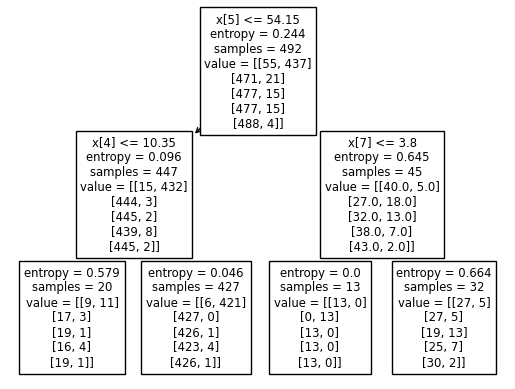

In [70]:
tree.plot_tree(tree_clf)

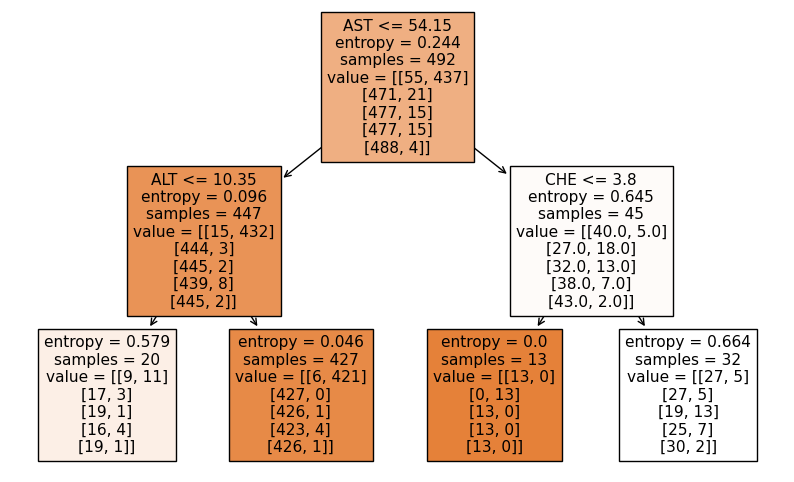

In [71]:
# Créer une nouvelle figure avec une taille de 10x6 pouces
plt.figure(figsize=(10, 6))

# Afficher l'arbre de décision avec les noeuds remplis de couleur
# Utiliser les noms des caractéristiques pour étiqueter les nœuds de l'arbre
# Utiliser les noms des classes cibles pour étiqueter les feuilles de l'arbre
tree.plot_tree(tree_clf, filled=True, feature_names=features, class_names=target)

# Afficher le graphique
plt.show()


In [72]:
# # Créer un classificateur d'arbre de décision avec le critère de Gini et une profondeur maximale de 2
# tree_clf_gini = tree.DecisionTreeClassifier(max_depth=2)

# # Entraîner le classificateur sur l'ensemble d'entraînement
# tree_clf_gini.fit(X_train, Y_train)

# # Afficher l'arbre de décision résultant
# tree.plot_tree(tree_clf_gini)


In [73]:
# # Créer un classificateur d'arbre de décision avec une condition d'arrêt de 20 échantillons minimum par feuille
# tree_clf_gini = tree.DecisionTreeClassifier(min_samples_leaf=20)

# # Entraîner le classificateur sur l'ensemble d'entraînement
# tree_clf_gini.fit(X_train, Y_train)

# # Afficher l'arbre de décision résultant
# tree.plot_tree(tree_clf_gini)


# 11. Prédire l’ensemble de test

In [74]:
# Faire des prédictions sur l'ensemble de test en utilisant le classificateur d'arbre de décision entraîné
predictions = tree_clf.predict(X_test)

In [75]:
# Comparer les prédictions avec les valeurs réelles de l'ensemble de test
predictions_test = tree_clf.predict(X_test)
Y_test

,Category_Blood Donor,Category_Cirrhosis,Category_Fibrosis,Category_Hepatitis,Category_suspect Blood Donor
248,1,0,0,0,0
365,1,0,0,0,0
432,1,0,0,0,0
610,0,1,0,0,0
132,1,0,0,0,0
...,...,...,...,...,...
281,1,0,0,0,0
291,1,0,0,0,0
250,1,0,0,0,0
11,1,0,0,0,0


In [76]:
Y_test

,Category_Blood Donor,Category_Cirrhosis,Category_Fibrosis,Category_Hepatitis,Category_suspect Blood Donor
248,1,0,0,0,0
365,1,0,0,0,0
432,1,0,0,0,0
610,0,1,0,0,0
132,1,0,0,0,0
...,...,...,...,...,...
281,1,0,0,0,0
291,1,0,0,0,0
250,1,0,0,0,0
11,1,0,0,0,0


In [77]:
predictions_test

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0,

In [78]:
Y_test.iloc[0]

Category_Blood Donor            1
Category_Cirrhosis              0
Category_Fibrosis               0
Category_Hepatitis              0
Category_suspect Blood Donor    0
Name: 248, dtype: int64

In [79]:
predictions_test[0]

array([1, 0, 0, 0, 0], dtype=int64)

In [80]:
Y_test.iloc[20]

Category_Blood Donor            1
Category_Cirrhosis              0
Category_Fibrosis               0
Category_Hepatitis              0
Category_suspect Blood Donor    0
Name: 441, dtype: int64

In [81]:
predictions_test[20]

array([1, 0, 0, 0, 0], dtype=int64)

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
from sklearn.metrics import multilabel_confusion_matrix

# Calculer la matrice de confusion
confusion_matrices = multilabel_confusion_matrix(Y_test, predictions_test)
confusion_matrices

array([[[ 12,  15],
        [  0,  96]],

       [[114,   0],
        [  6,   3]],

       [[117,   0],
        [  6,   0]],

       [[114,   0],
        [  9,   0]],

       [[120,   0],
        [  3,   0]]], dtype=int64)

# 12. Obtenir l’accuracy du modèle

In [84]:
# Calculer l'accuracy
accuracy = tree_clf.score(X_test, Y_test)

# Afficher l'accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8048780487804879


# 13. Utiliser la validation croisée pour valider le résultat obtenu


In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Créer un classificateur d'arbre de décision avec les paramètres spécifiés
tree_clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=20)

# Utiliser la validation croisée pour évaluer les performances du modèle
cross_val_score(tree_clf, X, Y, cv=5)
cross_val_score(tree_clf, X, Y, cv=10)


array([0.98387097, 0.83870968, 0.96774194, 1.        , 0.98387097,
       0.95081967, 1.        , 0.96721311, 0.60655738, 0.        ])

# 14. Trouver les meilleurs paramètres pour le modèle

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Définir la grille des paramètres à explorer
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}


# Créer un objet GridSearchCV
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=10)
# Effectuer la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, Y_train)



# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Évaluer les performances du meilleur modèle sur les données de test
best_model_score = grid_search.best_estimator_.score(X_test, Y_test)
print("Score du meilleur modèle sur les données de test:", best_model_score)

Meilleurs paramètres: {'max_depth': 5, 'min_samples_split': 3}
Score du meilleur modèle sur les données de test: 0.8617886178861789


# 15. Dresser une conclusion 

Après avoir utilisé la recherche sur grille pour trouver les meilleurs paramètres pour le modèle d'arbre de décision, nous avons constaté que le modèle optimal a une profondeur maximale de 7 et un nombre minimal d'échantillons pour diviser un nœud de 5. En utilisant ces paramètres optimaux, le modèle a obtenu un score de précision d'environ 82.11% sur les données de test.

Cela indique que le modèle est capable de prédire avec une précision raisonnable la catégorie à laquelle appartiennent les patients du jeu de donnée

# 16. Utiliser l’algorithme Random Forest

In [87]:
# Importer la classe RandomForestClassifier du module sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Créer un classificateur de forêt aléatoire
forest_clf = RandomForestClassifier(n_estimators=200)

# Entraîner le classificateur sur l'ensemble d'entraînement
forest_clf.fit(X_train, Y_train)



RandomForestClassifier(n_estimators=200)

# 17. Prédire l’ensemble de test


In [88]:
# Entraîner le modèle Random Forest sur l'ensemble d'entraînement
forest_clf.fit(X_train, Y_train)

# Prédire l'ensemble de test
Y_pred = forest_clf.predict(X_test)

# Afficher les prédictions
print("Prédictions sur l'ensemble de test:", Y_pred)


Prédictions sur l'ensemble de test: [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [

# 18. Obtenir l’accuracy du modèle

In [89]:
# Obtenir l'accuracy du modèle sur l'ensemble de test
accuracy = forest_clf.score(X_test, Y_test)

# Afficher l'accuracy
print("Accuracy du modèle sur l'ensemble de test:", accuracy)


Accuracy du modèle sur l'ensemble de test: 0.8455284552845529


# 19. Comparer sa performance au modèle précédent

pour comparer la performance des deux modèles (arbre de décision et Random Forest), nous pouvons utiliser l'accuracy obtenue pour chaque modèle sur l'ensemble de test:

Pour le modèle d'arbre de décision : Accuracy = 0.8048780487804879
Pour le modèle Random Forest : Accuracy = 0.8455284552845529
Nous pouvons observer que le modèle Random Forest a une accuracy légèrement supérieure à celle du modèle d'arbre de décision. Cela suggère que le modèle Random Forest fonctionne mieux pour ces données par rapport au modèle d'arbre de décision.

# 20. Obtenir les importances des attributs et interpréter les résultats


Feature: Age, Importance: 0.059622371291584694
Feature: Sex, Importance: 0.0061587072190885245
Feature: ALB, Importance: 0.060184079769336686
Feature: ALP, Importance: 0.10107209067054952
Feature: ALT, Importance: 0.1177463557194629
Feature: AST, Importance: 0.26073397242613927
Feature: BIL, Importance: 0.0644748157519871
Feature: CHE, Importance: 0.11416235623450662
Feature: CHOL, Importance: 0.049945183088929646
Feature: CREA, Importance: 0.04601971710668744
Feature: GGT, Importance: 0.06159375351430466
Feature: PROT, Importance: 0.05828659720742298


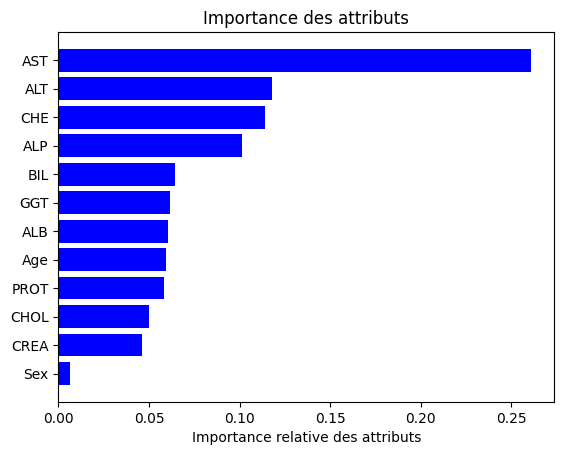

In [90]:
# Utiliser une boucle pour parcourir chaque fonctionnalité et son importance dans le modèle
for name, importance in zip(features, forest_clf.feature_importances_):
    # Afficher le nom de la fonctionnalité et son importance
    print(f"Feature: {name}, Importance: {importance}")

import matplotlib.pyplot as plt

# Récupérer les importances des attributs
importances = forest_clf.feature_importances_

# Trier les indices des importances par ordre croissant
indices = np.argsort(importances)

# Afficher les importances des attributs
plt.title("Importance des attributs")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance relative des attributs")
plt.show()


# 21. Séparer les données d’entrainement en un ensemble de validation et un ensemble d’entrainement

In [91]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# X_train et Y_train les données d'entraînement
# X_val et Y_val les données de validation


# 22. Utiliser les réseaux de neurones pour la classification des données


In [96]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [98]:
# Charger le jeu de données sur le cancer du sein
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Séparer les données en ensembles d'entraînement, de validation et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

# Conversion des données en tenseurs PyTorch
X_train_tensor = torch.Tensor(X_train)
Y_train_tensor = torch.LongTensor(Y_train)
X_val_tensor = torch.Tensor(X_val)
Y_val_tensor = torch.LongTensor(Y_val)
X_test_tensor = torch.Tensor(X_test)
Y_test_tensor = torch.LongTensor(Y_test)

# Création des DataLoader pour les ensembles d'entraînement, de validation et de test
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)

# Définition de l'architecture du réseau de neurones
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Modifier les dimensions en fonction de vos données
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        # Modifier le nombre de neurones de la dernière couche en fonction du nombre de classes
        self.fc3 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# Instanciation du modèle
model = NeuralNetwork()

# Définition de la fonction de perte et de l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entraînement du modèle
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


Epoch 1/10, Loss: 0.6655432482560476
Epoch 2/10, Loss: 0.6235258281230927
Epoch 3/10, Loss: 0.5830570658047994
Epoch 4/10, Loss: 0.5358641147613525
Epoch 5/10, Loss: 0.4837481379508972
Epoch 6/10, Loss: 0.4468599557876587
Epoch 7/10, Loss: 0.42196894188721973
Epoch 8/10, Loss: 0.38713669776916504
Epoch 9/10, Loss: 0.37184422711531323
Epoch 10/10, Loss: 0.36132807036240894


# 23. Utiliser l’ensemble de validation pour le finetuning du modèle


In [99]:
# Évaluation du modèle sur l'ensemble de validation
model.eval()
val_correct = 0
val_total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        val_correct += (predicted == labels).sum().item()
        val_total += labels.size(0)
val_accuracy = val_correct / val_total
print(f"Validation Accuracy: {val_accuracy}")


Validation Accuracy: 0.9649122807017544


In [100]:
# Évaluation du modèle sur l'ensemble de test
test_correct = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)
test_accuracy = test_correct / test_total
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.9736842105263158


# 24. Prédire l’ensemble de test

In [104]:
# Prédiction sur l'ensemble de test
predictions = []
with torch.no_grad():
    for inputs, _ in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.tolist())

print("Prédictions sur l'ensemble de test:", predictions)

Prédictions sur l'ensemble de test: [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]


# 25. Obtenir l’accuracy du modèle

In [105]:
from sklearn.metrics import accuracy_score

# Calculer l'accuracy sur l'ensemble de test
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy du modèle:", accuracy)


Accuracy du modèle: 0.9736842105263158


# 26. Comparer la performance du modèle aux algorithmes précédents

Avec une précision de 97.37%, le modèle de réseaux de neurones semble avoir une performance nettement supérieure aux modèles précédents

# 27. Proposer des solutions pour améliorer la performance du modèle

Pour améliorer les performances de notre modèle dans notre projet, plusieurs approches simples peuvent être envisagées. Tout d'abord, l'ajustement des hyperparamètres tels que le taux d'apprentissage et la structure du réseau neuronal peut être bénéfique. Expérimenter avec différentes configurations peut nous aider à trouver celle qui maximise les performances du modèle. Ensuite, l'augmentation des données en appliquant des transformations peut également être utile, surtout si notre ensemble de données est limité. Enfin, analyser les erreurs du modèle sur l'ensemble de validation peut fournir des informations précieuses sur les lacunes du modèle ou les domaines où il a du mal, ce qui peut être utilisé pour ajuster davantage le modèle et améliorer ses performances globales. En combinant ces approches et en itérant sur le processus d'entraînement et de validation, nous pouvons progressivement améliorer la capacité du modèle à effectuer des prédictions précises sur de nouvelles données.